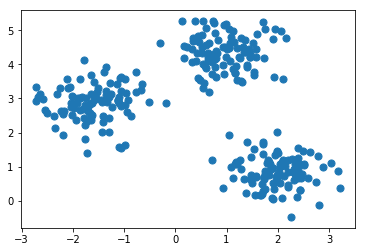

In [14]:
%matplotlib inline
# import the func that enables us to plot clusters
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt

#Get points such that they form 3 visually separable cluster
X, y = make_blobs(n_samples=300, centers=3, cluster_std=0.50, random_state=0)

# plot the points on a scatterplot
plt.scatter(X[:,0], X[:,1], s=50)
plt.show()


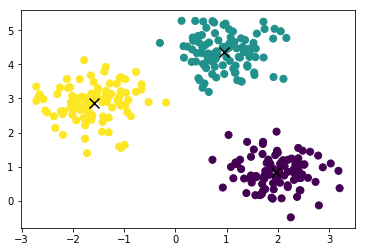

In [18]:
# import k-means class
from sklearn.cluster import KMeans

#initializer the k-Means objects. Set number of cluster to 3
#centroids initiliazation as 'random' and maximum iteration to 10
kmeans = KMeans(n_clusters=3, init='random',max_iter=10)

#compute the k-means clustering
kmeans.fit(X)

#predict the classes for every point
y_pred = kmeans.predict(X)

# plot the data points agains with different color for different classes
plt.scatter(X[:,0], X[:,1], c=y_pred, s=50)

# Get the list of the final centroids
centroids = kmeans.cluster_centers_

# plot the centroids onto the same scatterplots
plt.scatter(centroids[:, 0], centroids[:,1], c='black', s=100, marker='x')
plt.show()